#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, chi2_contingency
sns.set(color_codes = True)
%matplotlib inline

## Problem 1 - Wholesale Customers Analysis

### Problem Statement:
A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [2]:
customers = pd.read_csv('Wholesale+Customers+Data.csv')
customers.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


The dataset has 9 columns where:

    o Region and Channel are Categorical columns
    o Others are numeric
    o Buyer/Spender column does not hold any importance as it only has serial numbers which will already be indicated in    the index on reading the data into a dataframe

There also no null values in the data set

In [3]:
customers.set_index('Buyer/Spender', inplace = True)
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,,,,,,,,
1,Retail,Other,12669,9656,7561,214,2674,1338
2,Retail,Other,7057,9810,9568,1762,3293,1776
3,Retail,Other,6353,8808,7684,2405,3516,7844
4,Hotel,Other,13265,1196,4221,6404,507,1788
5,Retail,Other,22615,5410,7198,3915,1777,5185


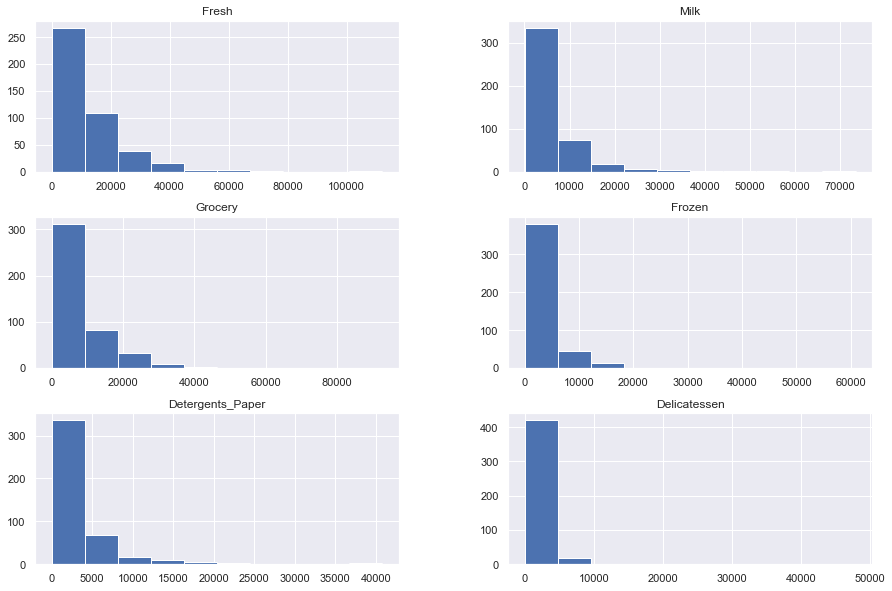

In [7]:
customers.hist(figsize=(15,10));

All of the variables seem to be right skewed. 

##### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less?

In [6]:
customers.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440,NaN,NaN,NaN,12000.3,12647.3,3,3127.75,8504,16933.8,112151
Milk,440,NaN,NaN,NaN,5796.27,7380.38,55,1533,3627,7190.25,73498
Grocery,440,NaN,NaN,NaN,7951.28,9503.16,3,2153,4755.5,10655.8,92780
Frozen,440,NaN,NaN,NaN,3071.93,4854.67,25,742.25,1526,3554.25,60869
Detergents_Paper,440,NaN,NaN,NaN,2881.49,4767.85,3,256.75,816.5,3922,40827
Delicatessen,440,NaN,NaN,NaN,1524.87,2820.11,3,408.25,965.5,1820.25,47943


We can see that Channel has 2 unique values and Region has 3 unique values

In order to find the Regions along with the Channels that spend the maximum and minimum expense, a new column "Total Expense" is added to sum up all the individual Item expenses:

<b>Total Expense = Fresh + Milk + Grocery + Frozen + Detergents_Paper + Delicatessen<b>

In [5]:
customers['Total Expense'] = np.sum(customers.iloc[:,2:], axis = 1)
customers.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Expense
Buyer/Spender,,,,,,,,,
1,Retail,Other,12669,9656,7561,214,2674,1338,34112
2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
3,Retail,Other,6353,8808,7684,2405,3516,7844,36610


In [5]:
customers.groupby(['Region'])['Total Expense'].sum().sort_values(ascending = False).to_frame()

,Total Expense
Region,
Other,10677599
Lisbon,2386813
Oporto,1555088


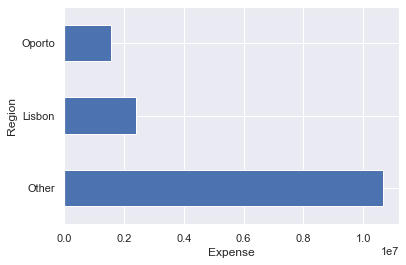

In [6]:
customers.groupby(['Region'])['Total Expense'].sum().sort_values(ascending = False).plot(kind = 'barh')
plt.xlabel('Expense')
plt.show()

In [7]:
customers.groupby(['Channel'])['Total Expense'].sum().sort_values(ascending = False).to_frame()

,Total Expense
Channel,
Hotel,7999569
Retail,6619931


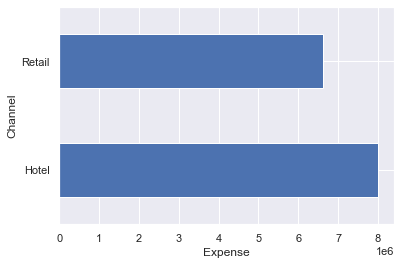

In [8]:
customers.groupby(['Channel'])['Total Expense'].sum().sort_values(ascending = False).plot(kind = 'barh')
plt.xlabel('Expense')
plt.show()

Thus, Region “Other” and Channel “Hotel” have the highest expense.

The Region “Oporto” and Channel “Retail” have the lowest expense

##### 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel?

#### Fresh

Text(0, 0.5, 'Std Dev. (price units)')

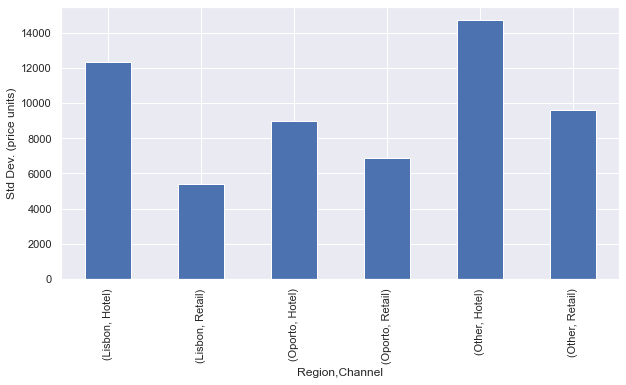

In [8]:
customers.groupby(['Region', 'Channel']).std()['Fresh'].plot(kind = 'bar', figsize=(10,5));
plt.ylabel('Std Dev. (price units)')

#### Milk

Text(0, 0.5, 'Std Dev. (price units)')

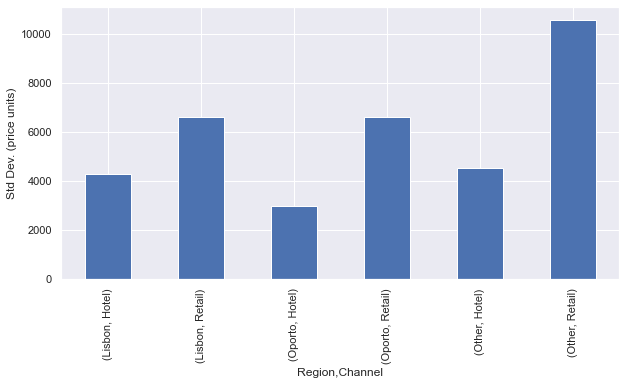

In [9]:
customers.groupby(['Region', 'Channel']).std()['Milk'].plot(kind = 'bar', figsize=(10,5));
plt.ylabel('Std Dev. (price units)')

#### Grocery

Text(0, 0.5, 'Std Dev. (price units)')

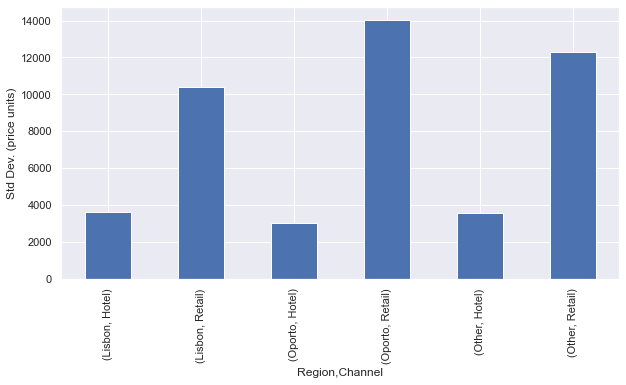

In [10]:
customers.groupby(['Region', 'Channel']).std()['Grocery'].plot(kind = 'bar', figsize=(10,5));
plt.ylabel('Std Dev. (price units)')

#### Frozen

Text(0, 0.5, 'Std Dev. (price units)')

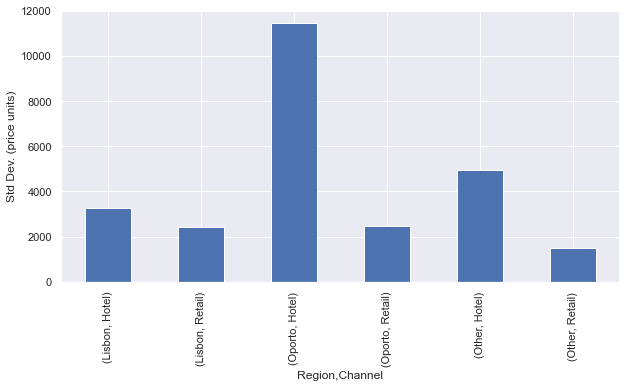

In [11]:
customers.groupby(['Region', 'Channel']).std()['Frozen'].plot(kind = 'bar', figsize=(10,5));
plt.ylabel('Std Dev. (price units)')

#### Detergents_Paper

Text(0, 0.5, 'Std Dev. (price units)')

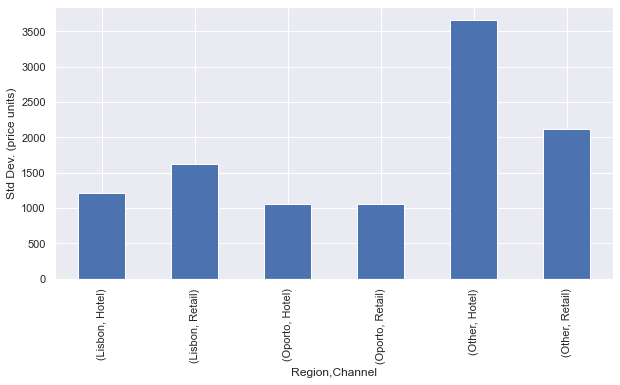

In [12]:
customers.groupby(['Region', 'Channel']).std()['Delicatessen'].plot(kind = 'bar', figsize=(10,5));
plt.ylabel('Std Dev. (price units)')

#### Delicatessen

Text(0, 0.5, 'Std Dev. (price units)')

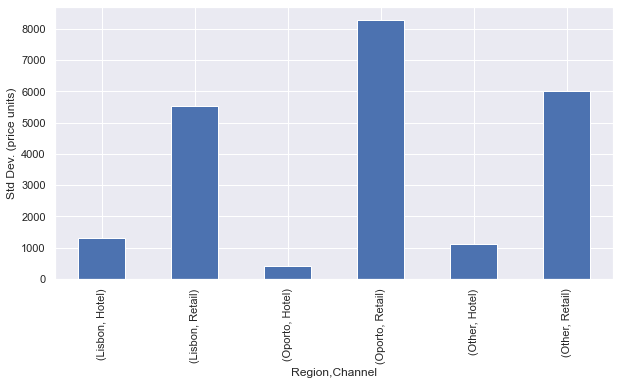

In [13]:
customers.groupby(['Region', 'Channel']).std()['Detergents_Paper'].plot(kind = 'bar', figsize=(10,5));
plt.ylabel('Std Dev. (price units)')

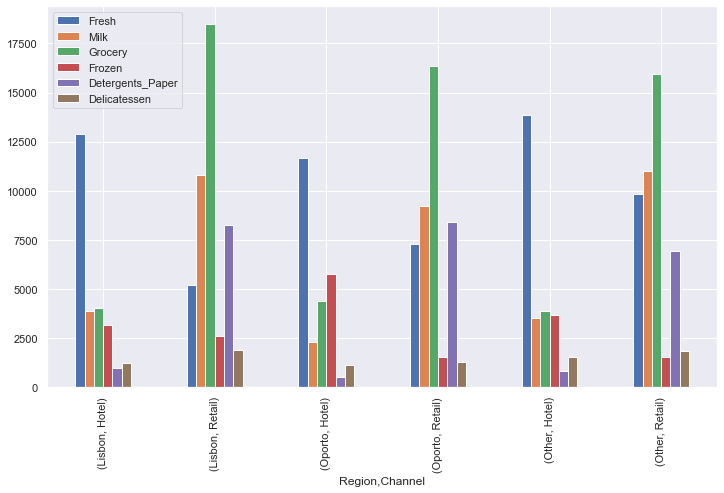

In [12]:
customers.iloc[:,:-1].groupby(['Region', 'Channel']).mean().plot(kind = 'bar', figsize = (12,7));

In [52]:
customers.iloc[:,:-1].groupby(['Region', 'Channel']).mean()

Fresh          Milk       Grocery       Frozen  \
Region Channel                                                          
Lisbon Hotel    12902.254237   3870.203390   4026.135593  3127.322034   
       Retail    5200.000000  10784.000000  18471.944444  2584.111111   
Oporto Hotel    11650.535714   2304.250000   4395.500000  5745.035714   
       Retail    7289.789474   9190.789474  16326.315789  1540.578947   
Other  Hotel    13878.052133   3486.981043   3886.734597  3656.900474   
       Retail    9831.504762  10981.009524  15953.809524  1513.200000   

                Detergents_Paper  Delicatessen  
Region Channel                                  
Lisbon Hotel          950.525424   1197.152542  
       Retail        8225.277778   1871.944444  
Oporto Hotel          482.714286   1105.892857  
       Retail        8410.263158   1239.000000  
Other  Hotel          786.682464   1518.284360  
       Retail        6899.238095   1826.209524

In [14]:
customers.iloc[:,:-1].groupby(['Region', 'Channel']).min()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Region Channel                                                              
Lisbon Hotel      514   258      489      91                 5             7
       Retail      18  2527     5265      61               788           120
Oporto Hotel        3   333     1330     264                15            51
       Retail     161   928     2743     131               332            59
Other  Hotel        3    55        3      25                 3             3
       Retail      23  1124     4523      33               523             3

In [15]:
customers.iloc[:,:-1].groupby(['Region', 'Channel']).max()

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Region Channel                                                                
Lisbon Hotel     56083  23527    16966   18711              5828          6854
       Retail    20782  28326    39694    8321             19410          6372
Oporto Hotel     32717  16784    13626   60869              1679          5609
       Retail    27082  25071    67298   11559             38102          3508
Other  Hotel    112151  43950    21042   36534              6907         47943
       Retail    44466  73498    92780    8132             40827         16523

##### 1.3 On the basis of descriptive measure of variability, which item shows the most inconsistent behavior? Which items show the least inconsistent behaviour?

In [19]:
customers.iloc[:,:-1].std().sort_values().to_frame()

,0
Delicatessen,2820.105937
Detergents_Paper,4767.854448
Frozen,4854.673333
Milk,7380.377175
Grocery,9503.162829
Fresh,12647.328865


We can see that Item “Delicatessen” has the least inconsistent behaviour (around 2820.11 price units) and “Fresh” has the most inconsistent behaviour (around 12647.33 price units).

##### 1.4 Are there any outliers in the data?

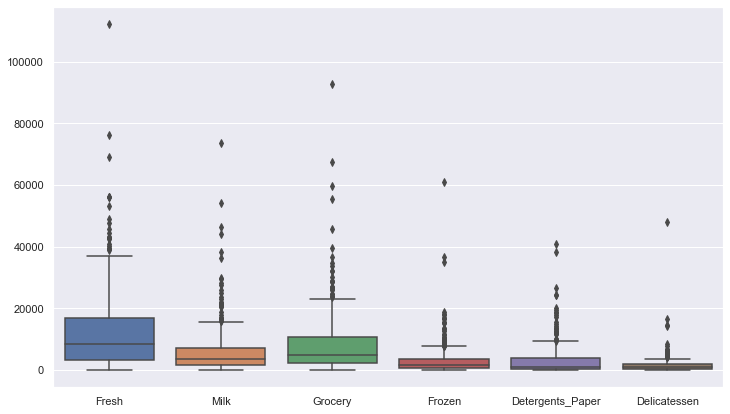

In [122]:
plt.figure(figsize=(12,7))
sns.boxplot(data = customers.iloc[:,:-1]);

In [6]:
customers1 = customers.drop(['Channel', 'Region','Total Expense'], axis = 1)
customers1.head(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,,,,,,
1,12669,9656,7561,214,2674,1338
2,7057,9810,9568,1762,3293,1776


In [7]:
IQR = customers1.quantile(0.75) - customers1.quantile(0.25)
minimum = customers1.quantile(0.25) - (1.5*IQR)
maximum = customers1.quantile(0.75) + (1.5*IQR)
outlier_mask = ((customers1 < minimum) | (customers1 > maximum))

In [23]:
minimum.to_frame()

,0
Fresh,-17581.250
Milk,-6952.875
Grocery,-10601.125
Frozen,-3475.750
Detergents_Paper,-5241.125
Delicatessen,-1709.750


In [24]:
maximum.to_frame()

,0
Fresh,37642.750
Milk,15676.125
Grocery,23409.875
Frozen,7772.250
Detergents_Paper,9419.875
Delicatessen,3938.250


In [25]:
outlier_mask.sum().sort_values(ascending = False).to_frame()

,0
Frozen,43
Detergents_Paper,30
Milk,28
Delicatessen,27
Grocery,24
Fresh,20


In [26]:
outlier_mask.sum().sum()

172

##### 1.5 On the basis of this report, what are the recommendations?

Insights

    •	The Item Fresh has the highest price variation (14746.57 price units) out of all the items especially in channel    Hotel of region Other. This may be attributed to availability of diverse brands or items having wide price ranges.
    •	The Items Fresh, Grocery, Detergents_Paper and Delicatessen have minimum annual spending costs as low as 3 price units. This may be due to cheap items like sweets or snacks.
    •	The variation in annual spending costs is high for Fresh, Frozen and Delicatessen items across all regions for channel Hotel.
    •	The variation in annual spending costs is high for Milk, Grocery and Detergents_Paper items across all regions for channel Retail.
    •	The items Frozen and Delicatessen have the lowest mean annual spending costs.


### Problem 2 - (Download Data)

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [2]:
survey = pd.read_csv('Survey-1.csv')
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [3]:
survey.set_index(['ID'], inplace = True)
survey.head()

,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
ID,,,,,,,,,,,,,
1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [53]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


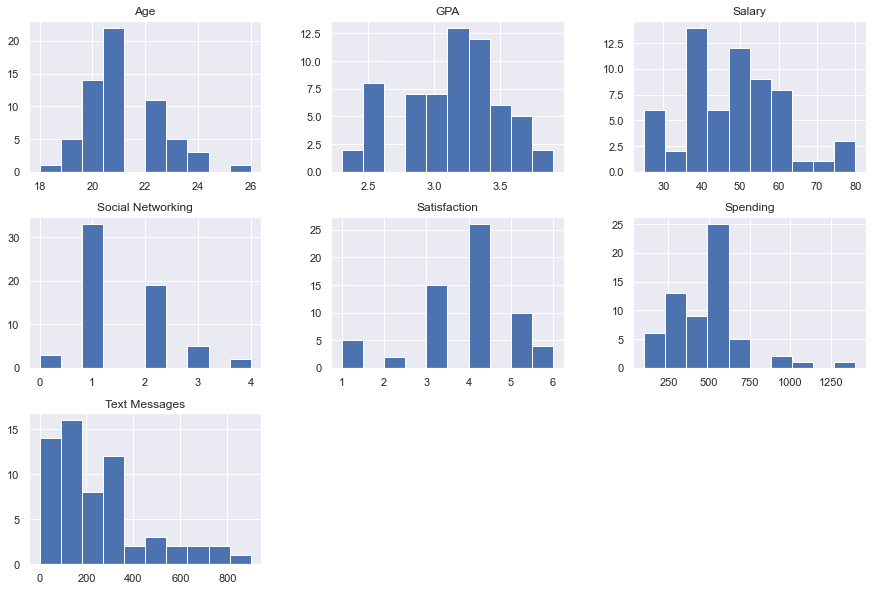

In [24]:
survey.hist(figsize=(15,10));

In [33]:
print('Age\n',survey.Age.unique(),'\n')
print('Social Networking\n',survey['Social Networking'].unique(),'\n')
print('Satisfaction\n',survey.Satisfaction.unique(),'\n')

Age
 [20 23 21 22 24 19 18 26] 

Social Networking
 [1 2 4 3 0] 

Satisfaction
 [3 4 6 2 5 1] 



In [31]:
# Discrete variables
survey.select_dtypes('int64').columns

Index(['Age', 'Social Networking', 'Satisfaction', 'Spending',
       'Text Messages'],
      dtype='object')

In [32]:
# Continuous variables
survey.select_dtypes('float64').columns

Index(['GPA', 'Salary'], dtype='object')

In [71]:
survey.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,62.0,21.129032,1.431311,18.0,20.0,21.00,22.0,26.0
GPA,62.0,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Salary,62.0,48.548387,12.080912,25.0,40.0,50.00,55.0,80.0
Social Networking,62.0,1.516129,0.844305,0.0,1.0,1.00,2.0,4.0
Satisfaction,62.0,3.741935,1.213793,1.0,3.0,4.00,4.0,6.0
Spending,62.0,482.016129,221.953805,100.0,312.5,500.00,600.0,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.0,200.00,300.0,900.0


##### 2.1. For this data, construct the following contingency tables (Keep Gender as row variable) 

##### 2.1.1. Gender and Major

In [72]:
gender_major = pd.crosstab(index = survey["Gender"], columns= survey["Major"], margins=True, margins_name="Total" )
gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


##### 2.1.2. Gender and Grad Intention 

In [6]:
gender_grad = pd.crosstab(index = survey["Gender"], columns = survey["Grad Intention"], margins=True, margins_name="Total")
gender_grad

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


##### 2.1.3. Gender and Employment 

In [73]:
gender_employment = pd.crosstab(index = survey["Gender"], columns = survey["Employment"], margins=True, margins_name="Total")
gender_employment

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


##### 2.1.4. Gender and Computer

In [74]:
gender_computer = pd.crosstab(index = survey["Gender"], columns = survey["Computer"], margins=True, margins_name="Total")
gender_computer

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


##### 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question: 

##### 2.2.1. What is the probability that a randomly selected CMSU student will be male? 

In [45]:
gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [51]:
survey.Gender.value_counts(normalize=True).to_frame()

,Gender
Female,0.532258
Male,0.467742


In [75]:
np.round(0.467742*100,3)

46.774

##### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [76]:
round(0.532258*100,3)

53.226

##### 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question: 

##### 2.3.1. Find the conditional probability of different majors among the male students in CMSU. 

In [54]:
gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [79]:
# P (Accounting | Male)
p_accounting_and_male = 4
p_male = 29
p_accounting_given_male = p_accounting_and_male/p_male
print(p_accounting_given_male,'\t', round(p_accounting_given_male*100,3),'%')

0.13793103448275862 	 13.793 %


In [80]:
# P(CIS | Male)
p_cis_and_male = 1
p_male = 29
p_cis_given_male = p_cis_and_male/p_male
print(p_cis_given_male,'\t', round(p_cis_given_male*100,3),'%')

0.034482758620689655 	 3.448 %


In [81]:
# P(Economics/Finance | Male)
p_economics_and_male = 4
p_male = 29
p_economics_given_male = p_economics_and_male/p_male
print(p_economics_given_male,'\t', round(p_economics_given_male*100,3),'%')

0.13793103448275862 	 13.793 %


In [82]:
# P(International Business | Male) 
p_business_and_male = 2
p_male = 29
p_business_given_male = p_business_and_male/p_male
print(p_business_given_male,'\t', round(p_business_given_male*100,3),'%')

0.06896551724137931 	 6.897 %


In [83]:
# P(Management | Male) 
p_management_and_male = 6
p_male = 29
p_management_given_male = p_management_and_male/p_male
print(p_management_given_male,'\t', round(p_management_given_male*100,3),'%')

0.20689655172413793 	 20.69 %


In [84]:
# P(Other | Male) 
p_other_and_male = 4
p_male = 29
p_other_given_male = p_other_and_male/p_male
print(p_other_given_male,'\t', round(p_other_given_male*100,3),'%')

0.13793103448275862 	 13.793 %


In [85]:
# P(Retailing/Marketing | Male)
p_retail_and_male = 5
p_male = 29
p_retail_given_male = p_retail_and_male/p_male
print(p_retail_given_male,'\t', round(p_retail_given_male*100,3),'%')

0.1724137931034483 	 17.241 %


In [86]:
# P(Undecided | Male)
p_undecided_and_male = 3
p_male = 29
p_undecided_given_male = p_undecided_and_male/p_male
print(p_undecided_given_male,'\t', round(p_undecided_given_male*100,3),'%')

0.10344827586206896 	 10.345 %


##### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [71]:
gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [87]:
p_female = 33

In [88]:
# P(Accounting | Female)
p_accounting_and_female = 3
p_accounting_given_female = p_accounting_and_female/p_female
print(p_accounting_given_female,'\t', round(p_accounting_given_female*100,3),'%')

0.09090909090909091 	 9.091 %


In [89]:
# P(CIS | Female)
p_cis_and_female = 3
p_cis_given_female = p_cis_and_female/p_female
print(p_cis_given_female,'\t', round(p_cis_given_female*100,3),'%')

0.09090909090909091 	 9.091 %


In [90]:
# P(Economics/Finance | Female)
p_economics_and_female = 7
p_economics_given_female = p_economics_and_female/p_female
print(p_economics_given_female,'\t', round(p_economics_given_female*100,3),'%')

0.21212121212121213 	 21.212 %


In [91]:
# P(International Business | Female) 
p_business_and_female = 4
p_business_given_female = p_business_and_female/p_female
print(p_business_given_female,'\t', round(p_business_given_female*100,3),'%')

0.12121212121212122 	 12.121 %


In [92]:
# P(Management | Female) 
p_management_and_female = 4
p_management_given_female = p_management_and_female/p_female
print(p_management_given_female,'\t', round(p_management_given_female*100,3),'%')

0.12121212121212122 	 12.121 %


In [93]:
# P(Other | Female) 
p_other_and_female = 3
p_other_given_female = p_other_and_female/p_female
print(p_other_given_female,'\t', round(p_other_given_female*100,3),'%')

0.09090909090909091 	 9.091 %


In [94]:
# P(Retailing/Marketing | Female)
p_retail_and_female = 9
p_retail_given_female = p_retail_and_female/p_female
print(p_retail_given_female,'\t', round(p_retail_given_female*100,3),'%')

0.2727272727272727 	 27.273 %


In [95]:
# P(Undecided | Female)
p_undecided_and_female = 0
p_undecided_given_female = p_undecided_and_female/p_female
round(p_undecided_given_female,3)

0.0

##### 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

##### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [81]:
gender_grad

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


In [89]:
male_and_grad_yes = 17
total_no_students = 62
print("Probability that a randomly chosen student is a male and intends to graduate {}".format(round((male_and_grad_yes/total_no_students)*100,3)))

Probability that a randomly chosen student is a male and intends to graduate 27.419


In [108]:
# OR another method P(A ∩ B) =  P(A | B)* P(B)
round(((17/28)*(28/62))*100,3)

27.419

##### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [90]:
gender_computer

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


In [ ]:
# Following rule of probability
# P(A ∩ B)  +  P(A ∩ B') = P(A) 
# P(Female and has laptop) + P(Female and does not have laptop) = P(Female)
# P(Female and does not have laptop) = P(Female) - P(Female and has laptop)

In [40]:
p_female_and_no_laptop = (33/62)-(29/62)
print(p_female_and_no_laptop,'\t',round(p_female_and_no_laptop*100,3),'%')

0.06451612903225806 	 6.452 %


##### 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

##### 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

In [95]:
gender_employment

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


In [ ]:
# Addition Rule (Non Mutually Exclusive)
# P(A or B) = P(A) + P(B) - P(A and B)
# P(A ∪ B)= P(A) + P(B)− P(A ∩ B)

In [93]:
p_male = 29/62
p_fulltime = 10/62
p_male_and_fulltime = 7/62
p_male_or_fulltime = p_male + p_fulltime - p_male_and_fulltime
round(p_male_or_fulltime*100, 3)

51.613

##### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [97]:
gender_major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


In [ ]:
#p_business_or_management_given_female = p_business_or_management_and_female/p_female

In [121]:
p_female = 33/62
p_female

0.532258064516129

In [116]:
p_business = 6/62
p_management = 10/62
p_business_or_management = p_business + p_management
p_business_or_management

0.25806451612903225

In [119]:
p_business_or_management_and_female = p_business_or_management * p_female
p_business_or_management_and_female

0.13735691987513007

In [120]:
p_business_or_management_given_female = p_business_or_management_and_female/p_female
p_business_or_management_given_female

0.25806451612903225

In [115]:
print(round(p_business_or_management_given_female*100,3),"%")

25.806 %


##### 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [9]:
survey_grad = survey[survey["Grad Intention"] != 'Undecided']
survey_grad.shape

(40, 13)

In [130]:
survey_grad["Grad Intention"].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
pd.crosstab(index = survey_grad["Gender"], columns = survey_grad["Grad Intention"], margins=True, margins_name="Total" )

Grad Intention,No,Yes,Total
Gender,,,
Female,9,11,20
Male,3,17,20
Total,12,28,40


P(A ∩ B) = P(A)*P(B)

P(Female ∩ Grad Intention Yes) = P(Female)*P(Grad Intention Yes)

In [4]:
#P(Female ∩ Grad Intention Yes) 
p_female_and_grad_Yes = 11/40
p_female_and_grad_Yes

0.275

In [7]:
#P(Female)*P(Grad Intention Yes)
p_female = 20/40
p_grad_Yes = 28/40
p_female*p_grad_Yes

0.35

Graduate intention and being female are not independent events since:

    P(Female ∩ Grad Intention Yes) != P(Female)*P(Grad Intention Yes).

##### 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. Answer the following questions based on the data

##### 2.6.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [8]:
survey.head(3)

,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
ID,,,,,,,,,,,,,
1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200


###### >>> Directly taking the count of GPA < 3

In [54]:
(survey.GPA < 3).sum()/survey.shape[0]

0.27419354838709675

##### >>> Designing Contingency table for Gender and GPA 

In [9]:
males_gpa_greater_than_3 = survey[(survey['Gender'] == 'Male') & (survey['GPA'] >= 3)].shape[0]
males_gpa_less_than_3 = survey[(survey['Gender'] == 'Male') & (survey['GPA'] < 3)].shape[0]
females_gpa_greater_than_3 = survey[(survey['Gender'] == 'Female') & (survey['GPA'] >= 3)].shape[0]
females_gpa_less_than_3 = survey[(survey['Gender'] == 'Female') & (survey['GPA'] < 3)].shape[0]

In [10]:
gpa_contingency = pd.DataFrame({'GPA < 3': [males_gpa_less_than_3, females_gpa_less_than_3], 'GPA >=3': [males_gpa_greater_than_3, females_gpa_greater_than_3 ]},
                              index = ['Male', 'Female'])
gpa_contingency

,GPA < 3,GPA >=3
Male,9,20
Female,8,25


In [11]:
np.sum(gpa_contingency, axis = 0)

GPA < 3    17
GPA >=3    45
dtype: int64

In [12]:
gpa_cont1 = pd.DataFrame({'GPA < 3':17, 'GPA >=3': 45}, index = ['Total'])
gpa_cont1

,GPA < 3,GPA >=3
Total,17,45


In [13]:
gpa_contingency = gpa_contingency.append(gpa_cont1)
gpa_contingency['Total'] = np.sum(gpa_contingency, axis = 1)
gpa_contingency

,GPA < 3,GPA >=3,Total
Male,9,20,29
Female,8,25,33
Total,17,45,62


In [15]:
p_gpa_less_than_3 = 17/62
print(p_gpa_less_than_3,'\t',round(p_gpa_less_than_3*100,3),'%')

0.27419354838709675 	 27.419 %


##### 2.6.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [146]:
survey.head(3)

,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
ID,,,,,,,,,,,,,
1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200


In [17]:
males_sal_greater_than_50 = survey[(survey['Gender'] == 'Male') & (survey['Salary'] >= 50)].shape[0]
males_sal_less_than_50 = survey[(survey['Gender'] == 'Male') & (survey['Salary'] < 50)].shape[0]
females_sal_greater_than_50 = survey[(survey['Gender'] == 'Female') & (survey['Salary'] >= 50)].shape[0]
females_sal_less_than_50 = survey[(survey['Gender'] == 'Female') & (survey['Salary'] < 50)].shape[0]

In [18]:
salary_contingency = pd.DataFrame({"Salary < 50": [males_sal_less_than_50, females_sal_less_than_50], 
                                   "Salary >= 50":[males_sal_greater_than_50,females_sal_greater_than_50]},
                                 index = ['Male', 'Female'])
salary_contingency

,Salary < 50,Salary >= 50
Male,15,14
Female,15,18


In [19]:
salary_cont = pd.DataFrame({"Salary < 50": 30, "Salary >= 50":32}, index = ['Total'])
salary_cont 

,Salary < 50,Salary >= 50
Total,30,32


In [20]:
salary_contingency = salary_contingency.append(salary_cont)
salary_contingency['Total'] = np.sum(salary_contingency, axis = 1)
salary_contingency

,Salary < 50,Salary >= 50,Total
Male,15,14,29
Female,15,18,33
Total,30,32,62


In [21]:
# Proabability that salary >=50 GIVEN that gender is Male
p_sal_greater_than_50_given_male = 14/29
print(p_sal_greater_than_50_given_male,"\t", round(p_sal_greater_than_50_given_male*100,3),'%')

0.4827586206896552 	 48.276 %


In [23]:
# Proabability that salary >=50 GIVEN that gender is Female
p_sal_greater_than_50_given_female = 18/33
print(p_sal_greater_than_50_given_female,"\t", round(p_sal_greater_than_50_given_female*100,3),'%')

0.5454545454545454 	 54.545 %


##### 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

##### Histograms

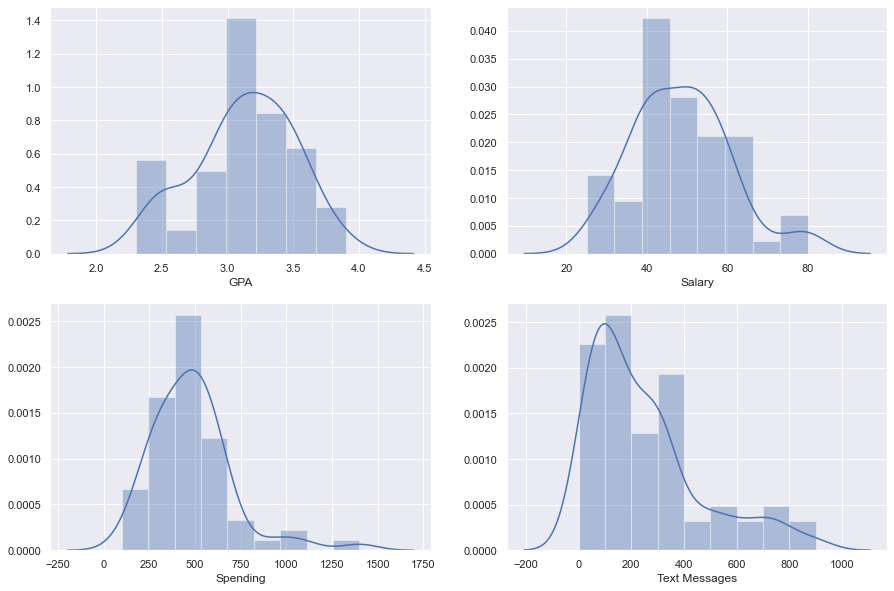

In [44]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(survey['GPA']);
plt.subplot(2,2,2)
sns.distplot(survey['Salary']);
plt.subplot(2,2,3)
sns.distplot(survey['Spending']);
plt.subplot(2,2,4)
sns.distplot(survey['Text Messages']);

##### Mean, Median & Mode

In [37]:
survey.describe().T.loc[['GPA','Salary', 'Spending', 'Text Messages' ]][['mean', '50%']]

,mean,50%
GPA,3.129032,3.15
Salary,48.548387,50.00
Spending,482.016129,500.00
Text Messages,246.209677,200.00


In [28]:
survey[['GPA','Salary', 'Spending', 'Text Messages' ]].mode()

,GPA,Salary,Spending,Text Messages
0,3.0,40.0,500.0,300.0
1,3.1,NaN,NaN,NaN
2,3.4,NaN,NaN,NaN


In [38]:
survey_stats = survey.describe().T.loc[['GPA','Salary', 'Spending', 'Text Messages' ]][['mean', '50%']]
survey_stats['mode'] = pd.Series(data = [survey['GPA'].mode()[0], survey['Salary'].mode()[0], 
                                         survey['Spending'].mode()[0], survey['Text Messages'].mode()[0]], 
                                 index = ['GPA','Salary', 'Spending', 'Text Messages' ])
survey_stats

,mean,50%,mode
GPA,3.129032,3.15,3.0
Salary,48.548387,50.00,40.0
Spending,482.016129,500.00,500.0
Text Messages,246.209677,200.00,300.0


GPA seems to be somewhat normally distributed since mean, median and mode are almost equal 

##### Skewness

In [36]:
survey.skew().loc[['GPA','Salary', 'Spending', 'Text Messages' ]].sort_values(ascending = False).to_frame()

,0
Spending,1.585915
Text Messages,1.295808
Salary,0.534701
GPA,-0.314600


On cross-checking the Skewness values and distribution graphs 
 
    GPA             => Left Skewed
    Salary          => Right Skewed
    Spending        => Right Skewed
    Text Messages   => Right Skewed

### Problem 3

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [8]:
shingles = pd.read_csv('A+&+B+shingles.csv')
shingles.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [9]:
shingles.isnull().sum()

A    0
B    5
dtype: int64

In [10]:
shingles_A = shingles.drop(['B'], axis = 1)
shingles_B = shingles.drop(['A'], axis = 1)

#### STEP 1: Define Null Hypothesis
    H0:  𝜇 <=0.35
    HA:  𝜇 > 0.35

#### STEP 2: State Significance Level
    α = 0.05

##### 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

#### STEP 3: Compute Test Statistic

In [28]:
# VARIABLE VALUES
mu = 0.35; n = 36
xA = shingles_A.mean(); xB = shingles_B.mean()
sA = shingles_A.std();  sB = shingles_B.std()
print("Shingle A")
print(" Mean: {}\t Std: {}".format(xA.values, sA.values))
print("\nShingle B")
print(" Mean: {}\t Std: {}".format(xB.values, sB.values))

Shingle A
 Mean: [0.31666667]	 Std: [0.13573083]

Shingle B
 Mean: [0.27354839]	 Std: [0.13729648]


###### Shingles A

In [11]:
t_test_A, p_value_A = ttest_1samp(shingles_A, 0.35)
p_value_A = p_value_A/2
print('SHINGLES A')
print("T-Statistic: {}\t p value: {}".format(t_test_A, p_value_A))

SHINGLES A
T-Statistic: [-1.47350463]	 p value: [0.07477633]


###### Shingles B

In [15]:
t_test_B, p_value_B = ttest_1samp(shingles_B, 0.35, nan_policy='omit')
p_value_B = p_value_B/2
print('SHINGLES B')
print("T-Statistic: {}\t p value: {}".format(t_test_B, p_value_B))

SHINGLES B
T-Statistic: [-3.1003313069986995]	 p value: [0.0020904774003191826]


In [75]:
shingles_stats = pd.DataFrame({'T-Statistic': [np.round(t_test_A,3), np.round(t_test_B,3)], 
                               'p value': [np.round(p_value_A,3), np.round(p_value_B,3)]}, 
                             index = ['Shingles A', 'Shingles B'])
shingles_stats

,T-Statistic,p value
Shingles A,[-1.474],[0.075]
Shingles B,[-3.1],[0.002]


#### STEP 4: Compare p values with Significance level 0.05 and Conclude

##### Shingles A

We can see that 0.075 > 0.05 ==> Fail to Reject H0

We fail to reject that mean moisture contents of Shingles A is less than 0.35

##### Shingles B

We can see that 0.002 < 0.05 ==> Reject H0 and Accept HA

We accept that mean moisture contents of Shingles B is greater than 0.35


##### 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

#### Assumption to be checked before the test for equality of means is performed

•	The observations of the samples should be independent of each other.

•	The data for the two shingles should be normally distributed.


#### STEP 1 : State Null & Alternate Hypothesis

    𝐻0: 𝜇𝐴 = 𝜇𝐵
    𝐻𝐴: 𝜇𝐴 ≠ 𝜇𝐵

#### STEP 2 : State Significance Level

    α = 0.05

#### STEP 3: Determine type of test to be used
    T Test (Two Sample Independent) since we are comparing the means between two samples 

#### STEP 4: Calculate T-Test Statistic and p value

In [39]:
t_test, p_value = ttest_ind(shingles['A'],shingles['B'], nan_policy = 'omit')
print("T-Statistic: {}\t p value: {}".format(t_test, p_value))

T-Statistic: 1.2896282719661123	 p value: 0.2017496571835306


In [40]:
np.round(p_value, 3)

0.202

In [17]:
np.round(t_test, 3)

1.29

#### STEP 5: Compare p value with Significance Level and Conclude

0.202 > 0.05 ==> Fail to reject H0

We fail to reject that the means for shingles A and B are equal